In [1]:
import pandas as pd

In [2]:
teams = pd.read_csv("teams.csv")

In [3]:
teams


,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0,0.0
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0,0.0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0,0.0
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0,0.0
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,19,26,25.0,179.0,71.1,0,0.0,0.0
2140,ZIM,Zimbabwe,2004,11,14,25.1,177.8,70.5,3,0.0,0.0
2141,ZIM,Zimbabwe,2008,15,16,26.1,171.9,63.7,4,3.0,1.0
2142,ZIM,Zimbabwe,2012,8,9,27.3,174.4,65.2,0,4.0,2.3


In [4]:
teams= teams[["team","age","country","year","events","athletes","medals","prev_medals","prev_3_medals"]]

In [5]:
teams


,team,age,country,year,events,athletes,medals,prev_medals,prev_3_medals
0,AFG,22.0,Afghanistan,1964,8,8,0,0.0,0.0
1,AFG,23.2,Afghanistan,1968,5,5,0,0.0,0.0
2,AFG,29.0,Afghanistan,1972,8,8,0,0.0,0.0
3,AFG,23.6,Afghanistan,1980,11,11,0,0.0,0.0
4,AFG,18.6,Afghanistan,2004,5,5,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
2139,ZIM,25.0,Zimbabwe,2000,19,26,0,0.0,0.0
2140,ZIM,25.1,Zimbabwe,2004,11,14,3,0.0,0.0
2141,ZIM,26.1,Zimbabwe,2008,15,16,4,3.0,1.0
2142,ZIM,27.3,Zimbabwe,2012,8,9,0,4.0,2.3


In [6]:
import seaborn as sns

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


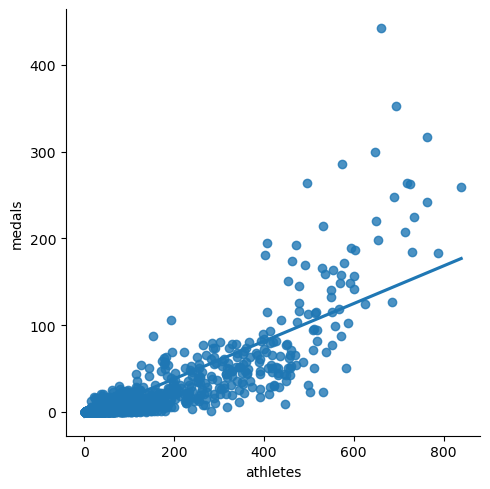

In [8]:
sns.lmplot(x="athletes",y="medals",data=teams,fit_reg=True,ci=None)

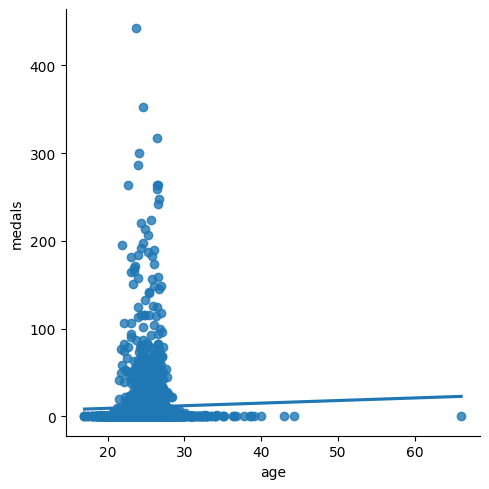

In [7]:
sns.lmplot(x="age",y="medals",data=teams,fit_reg=True,ci=None)

<Axes: ylabel='Frequency'>

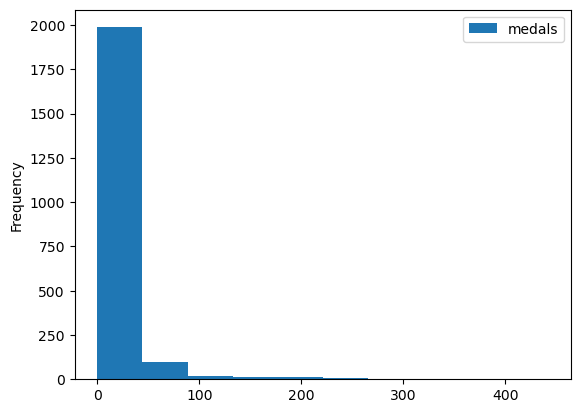

In [10]:
teams.plot.hist(y="medals")

In [11]:
teams[teams.isnull().any(axis=1)]

,team,age,country,year,events,athletes,medals,prev_medals,prev_3_medals
19,ALB,25.3,Albania,1992,8,9,0,NaN,NaN
26,ALG,26.0,Algeria,1964,7,7,0,NaN,NaN
39,AND,28.3,Andorra,1976,2,3,0,NaN,NaN
50,ANG,17.4,Angola,1980,14,17,0,NaN,NaN
59,ANT,23.2,Antigua and Barbuda,1976,11,17,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2092,VIN,20.5,Saint Vincent and the Grenadines,1988,6,6,0,NaN,NaN
2103,YAR,27.7,North Yemen,1984,3,3,0,NaN,NaN
2105,YEM,19.6,Yemen,1992,8,8,0,NaN,NaN
2112,YMD,23.6,South Yemen,1988,5,5,0,NaN,NaN


In [21]:
teams=teams.dropna()

In [22]:
teams

,team,age,country,year,events,athletes,medals,prev_medals,prev_3_medals
0,AFG,22.0,Afghanistan,1964,8,8,0,0.0,0.0
1,AFG,23.2,Afghanistan,1968,5,5,0,0.0,0.0
2,AFG,29.0,Afghanistan,1972,8,8,0,0.0,0.0
3,AFG,23.6,Afghanistan,1980,11,11,0,0.0,0.0
4,AFG,18.6,Afghanistan,2004,5,5,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
2139,ZIM,25.0,Zimbabwe,2000,19,26,0,0.0,0.0
2140,ZIM,25.1,Zimbabwe,2004,11,14,3,0.0,0.0
2141,ZIM,26.1,Zimbabwe,2008,15,16,4,3.0,1.0
2142,ZIM,27.3,Zimbabwe,2012,8,9,0,4.0,2.3


In [23]:
train= teams[teams['year']<2016].copy()
test= teams[teams['year']>=2016].copy()

In [24]:
train.shape


(1813, 9)

In [25]:
from sklearn.linear_model import LinearRegression
reg =LinearRegression()


In [26]:
predictors=["athletes","prev_medals","events","prev_3_medals"]
target="medals"

In [27]:
reg.fit(train[predictors],train['medals'])

LinearRegression()

In [33]:
prediction =reg.predict(test[predictors])

In [34]:
test["predictions"]=prediction

In [35]:
test


,team,age,country,year,events,athletes,medals,prev_medals,prev_3_medals,predictions
7,AFG,24.7,Afghanistan,2016,3,3,0,1.0,0.7,0.938581
25,ALB,23.7,Albania,2016,6,6,0,0.0,0.0,-0.179144
38,ALG,24.0,Algeria,2016,48,74,2,1.0,1.0,-0.421394
49,AND,26.0,Andorra,2016,4,4,0,0.0,0.0,0.137893
58,ANG,27.5,Angola,2016,10,26,0,0.0,0.0,2.670108
...,...,...,...,...,...,...,...,...,...,...
2091,VIE,26.9,Vietnam,2016,24,28,2,0.0,0.3,-2.048688
2099,VIN,20.8,Saint Vincent and the Grenadines,2016,4,4,0,0.0,0.0,0.137893
2111,YEM,19.3,Yemen,2016,3,3,0,0.0,0.0,0.296412
2132,ZAM,24.1,Zambia,2016,7,7,0,0.0,0.0,-0.337663


In [36]:
test.loc[test["predictions"]<0,"predictions"]=0

In [37]:
test["predictions"]=test["predictions"].round()

In [38]:
test

,team,age,country,year,events,athletes,medals,prev_medals,prev_3_medals,predictions
7,AFG,24.7,Afghanistan,2016,3,3,0,1.0,0.7,1.0
25,ALB,23.7,Albania,2016,6,6,0,0.0,0.0,0.0
38,ALG,24.0,Algeria,2016,48,74,2,1.0,1.0,0.0
49,AND,26.0,Andorra,2016,4,4,0,0.0,0.0,0.0
58,ANG,27.5,Angola,2016,10,26,0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...
2091,VIE,26.9,Vietnam,2016,24,28,2,0.0,0.3,0.0
2099,VIN,20.8,Saint Vincent and the Grenadines,2016,4,4,0,0.0,0.0,0.0
2111,YEM,19.3,Yemen,2016,3,3,0,0.0,0.0,0.0
2132,ZAM,24.1,Zambia,2016,7,7,0,0.0,0.0,0.0


In [39]:
from sklearn.metrics import mean_absolute_error
error=mean_absolute_error(test["medals"],test["predictions"])
error

3.711442786069652

In [40]:
teams.describe()["medals"]

count    2014.000000
mean       10.990070
std        33.627528
min         0.000000
25%         0.000000
50%         0.000000
75%         5.000000
max       442.000000
Name: medals, dtype: float64